# Transformada rápida de Fourier con Scipy

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack

Creemos una señal unidimensional y periódica con dos componentes sinusoidales

<IPython.core.display.Javascript object>


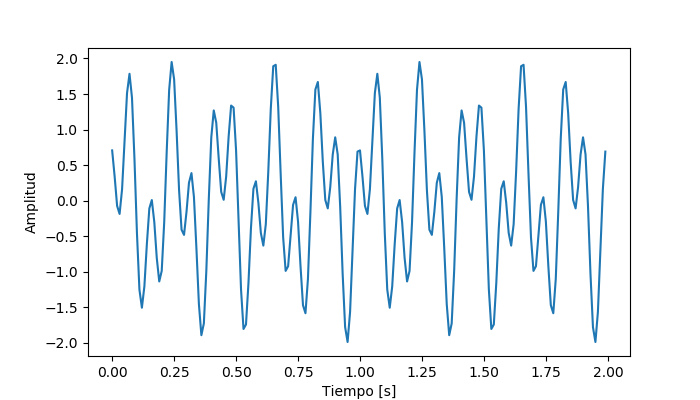

In [2]:
F_s = 100
t = np.linspace(0, 2, 2*F_s, endpoint=False)
x = np.sin(2*np.pi*t*5) + np.cos(2*np.pi*t*12 + np.pi/4)

fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(t, x)
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud');

Para obtener su transformada de Fourier podemos usar el modulo `fftpack` de scipy

- `fftpack.fft`: Calcula la transformada directa
- `fftpack.ifft`: Calcula la transformada inversa
- `fftpack.fftfreq`: Crea una arreglo de frecuencias (conveniente cuando se quiere graficar el espectro)
- `fftpack.fftshift` e `ifftshift`: Cambia el orden de los componentes del espectro de $[0,\ldots, F_s/2, -F_s/2, \ldots, -F_s/N]$ a $[-F_s/2, \ldots, 0, \ldots, F_s/2]$

En general la transformada de Fourier tiene valores complejos 

Analizamos e interpretamos graficamente el valor absoluto y la fase (angulo) por separado 

(-1.0872387315154212e-13-9.4526208368451e-16j)
<class 'numpy.complex128'>


<IPython.core.display.Javascript object>


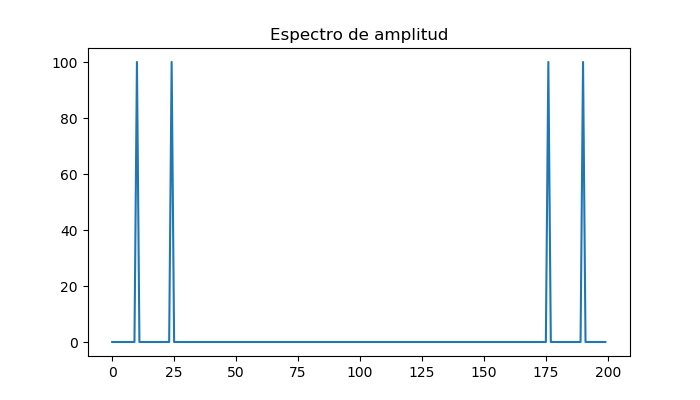

Text(0.5, 1.0, 'Espectro de amplitud')

In [3]:
S = scipy.fftpack.fft(x, n=len(x))
print(S[11])
print(type(S[11]))

fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(np.absolute(S))
ax.set_title('Espectro de amplitud')

En el gráfico anterior no especificamos el eje de las abscisas

Podemos usar fftfreq para crear un arreglo de frecuencias para poner en el eje de las abscisas

Los argumentos de fftfreq son el tiempo de muestreo (inverso de la frecuencia) y el largo de la serie

[  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5
  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5
  18.   18.5  19.   19.5  20.   20.5  21.   21.5  22.   22.5  23.   23.5
  24.   24.5  25.   25.5  26.   26.5  27.   27.5  28.   28.5  29.   29.5
  30.   30.5  31.   31.5  32.   32.5  33.   33.5  34.   34.5  35.   35.5
  36.   36.5  37.   37.5  38.   38.5  39.   39.5  40.   40.5  41.   41.5
  42.   42.5  43.   43.5  44.   44.5  45.   45.5  46.   46.5  47.   47.5
  48.   48.5  49.   49.5 -50.  -49.5 -49.  -48.5 -48.  -47.5 -47.  -46.5
 -46.  -45.5 -45.  -44.5 -44.  -43.5 -43.  -42.5 -42.  -41.5 -41.  -40.5
 -40.  -39.5 -39.  -38.5 -38.  -37.5 -37.  -36.5 -36.  -35.5 -35.  -34.5
 -34.  -33.5 -33.  -32.5 -32.  -31.5 -31.  -30.5 -30.  -29.5 -29.  -28.5
 -28.  -27.5 -27.  -26.5 -26.  -25.5 -25.  -24.5 -24.  -23.5 -23.  -22.5
 -22.  -21.5 -21.  -20.5 -20.  -19.5 -19.  -18.5 -1

<IPython.core.display.Javascript object>


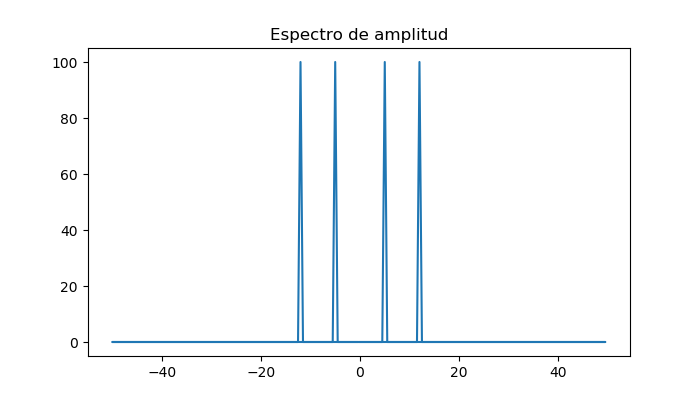

Text(0.5, 1.0, 'Espectro de amplitud')

In [4]:
freq = scipy.fftpack.fftfreq(d=1/F_s, n=len(x))
print(freq)
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(freq, np.absolute(S))
ax.set_title('Espectro de amplitud')

Para que el gráfico se vea correctamente conectado usamos fftshift


<IPython.core.display.Javascript object>


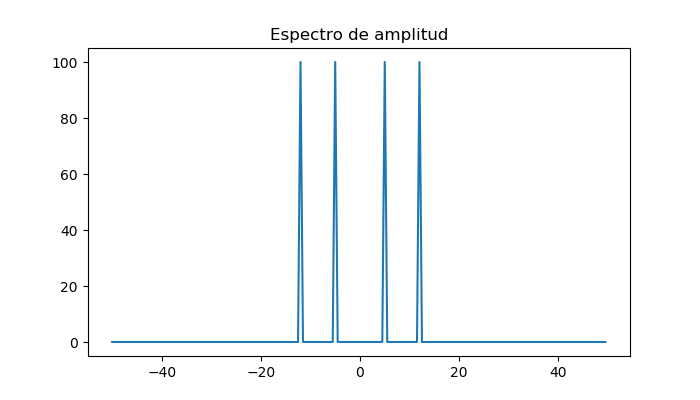

Text(0.5, 1.0, 'Espectro de amplitud')

In [5]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(scipy.fftpack.fftshift(freq), scipy.fftpack.fftshift(np.absolute(S)))
ax.set_title('Espectro de amplitud')

En los casos que el espectro de amplitud sea simétrico (siempre si se usan datos reales) podemos simplemente graficar la primera mitad del espectro

<IPython.core.display.Javascript object>


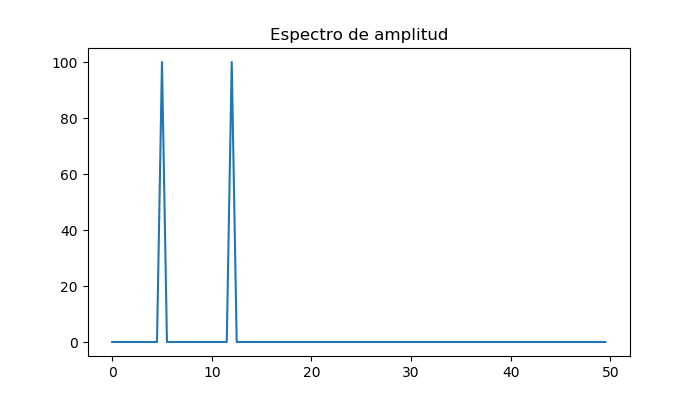

Text(0.5, 1.0, 'Espectro de amplitud')

In [6]:
fig, ax = plt.subplots(figsize=(7, 4))
N = len(x)
ax.plot(freq[:N//2], np.absolute(S)[:N//2])
ax.set_title('Espectro de amplitud')

**El espectro de amplitud nos dice que tan "fuerte" era la variación de la señal original en una frecuencia dada**

Para que calce con la amplitud de la señal hay que multiplicar por un factor $1/F_s = 2/N$

<IPython.core.display.Javascript object>


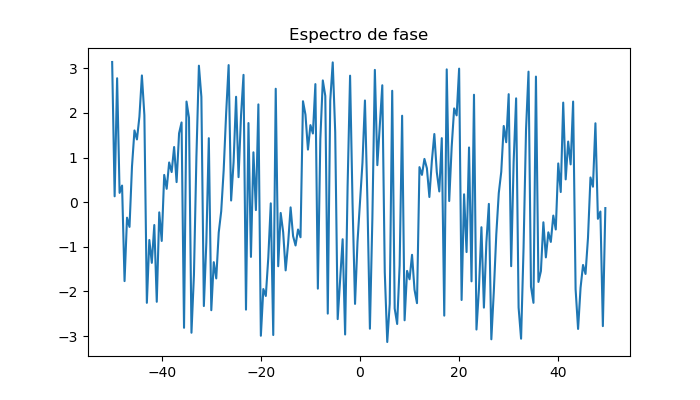

In [7]:
fig, ax = plt.subplots(figsize=(7, 4))
N = len(x)
ax.plot(scipy.fftpack.fftshift(freq), scipy.fftpack.fftshift(np.angle(S)))
ax.set_title('Espectro de fase');

El espectro de fase en cambio nos dice el ángulo (desfase) de cada componente sinusoidal con respecto al desfase cero

La forma más correcta de visualizar el espectro de fase sería enmascararlo con el espectro amplitud ¿Por qué?

<IPython.core.display.Javascript object>


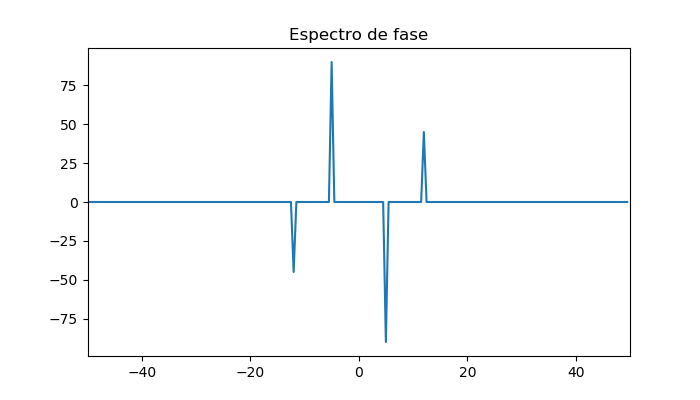

In [8]:
fig, ax = plt.subplots(figsize=(7, 4))
N = len(x)
mask = np.absolute(S) < 10
phase_spectrum = np.angle(S)
phase_spectrum[mask] = 0.
ax.plot(scipy.fftpack.fftshift(freq), scipy.fftpack.fftshift(phase_spectrum)*180/np.pi)
ax.set_xlim([-F_s/2, F_s/2])
ax.set_title('Espectro de fase');

<IPython.core.display.Javascript object>


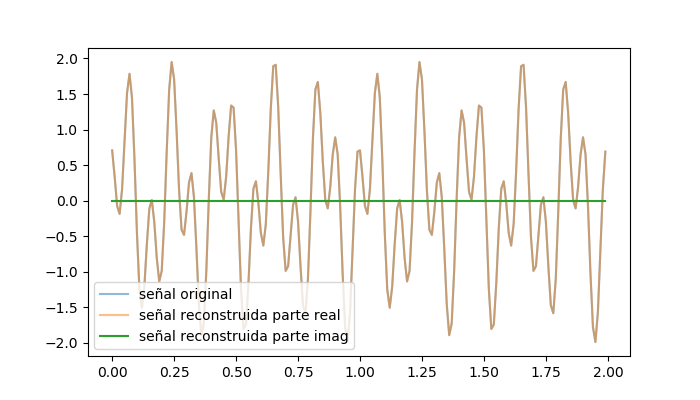

In [9]:
x_hat = scipy.fftpack.ifft(S)

fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(t, x, alpha=0.5 , label='señal original')
ax.plot(t, np.real(x_hat), alpha=0.5 , label='señal reconstruida parte real')
ax.plot(t, np.imag(x_hat), label='señal reconstruida parte imag')
plt.legend();


- Usamos ifft para reconstruir la señal original
- Notemos que la reconstrucción es un número complejo (con parte imaginaria muy pequeña la cual podemos descartar facilmente)  

### Fuga espectral

- Si las frecuencias no calzan exactamente en la grilla ocurre el fenomeno de **fuga espectral**
- Grafica nuevamente el espectro cambiando las frecuencias de las señales por números racionales, por ejemplo 5.14241234 y 12.4123

### Aliasing

- Si la frecuencia de muestreo es menor que el doble de la frecuencia más alta ocurre **aliasing**
- Disminuye la frecuencia de muestreo y observa la ubicación de los componentes de frecuencia en el espectro

# ¿Cómo funciona la FFT?

La FFT explota las simetrías en la matriz de coeficientes de Fourier

Sea $W_N = e^{-j \frac{2\pi}{N}}$ y una señal $x[n]$ con $N$ muestras su espectro $S[k]$ con $N$ frecuencias es

$$
\begin{align}
\begin{pmatrix} 
S[0] \\
S[1] \\
S[2] \\
\vdots \\
S[N-1] \\
\end{pmatrix} &=
\begin{pmatrix}
1 & 1 & 1 & \cdots & 1 \\
1 & W_N & W_N^2 & \cdots & W_N^{N-1} \\
1 & W_N^2 & W_N^4 & \cdots & W_N^{N-2} \\
\vdots & \dots & \dots & \ddots &  \vdots \\
1 & W_N^{N-1} & W_N^{N-2} & \cdots & W_N \\
\end{pmatrix} 
\begin{pmatrix} 
x[0] \\
x[1] \\
x[2] \\
\vdots \\
x[N-1] \\
\end{pmatrix} \nonumber  \\
S &= \Omega x,
\end{align}
$$

donde se cumple que 
$$
\begin{align}
S[k] &=  S_E[k] + \exp \left( -j2\pi \frac{k}{N} \right) S_O[k] ~~~ \forall k \in [0,N/2] \\
S[k + N/2] &=  S_E[k + N/2] - \exp \left( -j2\pi \frac{k}{N} \right) S_O[k + N/2] \\
 &=  S_E[k] - \exp \left( -j2\pi \frac{k}{N} \right) S_O[k] \\
\end{align}
$$

es decir se comparten términos entre la DFT de los elementos pares e impares de $x[n]$

<IPython.core.display.Javascript object>


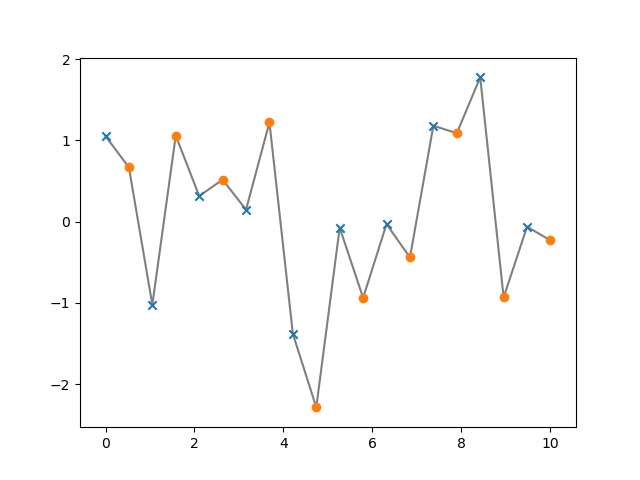

In [10]:
t = np.linspace(0, 10, num=20)
x = np.random.randn(20)
plt.figure()
plt.plot(t, x, c='k', alpha=0.5)
plt.scatter(t[::2], x[::2], marker='x', zorder=100)
plt.scatter(t[1::2], x[1::2], marker='o', zorder=100);

In [11]:
def DFT(x):
    N = len(x)
    W_N = np.exp(-1j*2*np.pi/N)
    n = np.arange(N)
    Omega = W_N**(n*n.reshape(1,-1).T)
    return np.dot(Omega, x)

In [12]:
np.set_printoptions(precision=2)
print(scipy.fftpack.fft(x))
print(DFT(x))

[ 1.6 +0.j    4.72+1.49j -6.7 -1.75j  3.18-0.6j   4.06-2.58j  1.57+4.68j
  4.05-1.31j -2.36-2.07j  1.58-1.51j -1.47-5.98j  2.18+0.j   -1.47+5.98j
  1.58+1.51j -2.36+2.07j  4.05+1.31j  1.57-4.68j  4.06+2.58j  3.18+0.6j
 -6.7 +1.75j  4.72-1.49j]
[ 1.6 +0.00e+00j  4.72+1.49e+00j -6.7 -1.75e+00j  3.18-6.04e-01j
  4.06-2.58e+00j  1.57+4.68e+00j  4.05-1.31e+00j -2.36-2.07e+00j
  1.58-1.51e+00j -1.47-5.98e+00j  2.18+1.46e-15j -1.47+5.98e+00j
  1.58+1.51e+00j -2.36+2.07e+00j  4.05+1.31e+00j  1.57-4.68e+00j
  4.06+2.58e+00j  3.18+6.04e-01j -6.7 +1.75e+00j  4.72-1.49e+00j]


In [13]:
S = DFT(x)
Se = DFT(x[0::2])
So = DFT(x[1::2])
print(S[:10])
print(Se + np.exp(-1j*2*np.pi*np.arange(10)/len(x))*So)
print(S[10:])
print(Se - np.exp(-1j*2*np.pi*np.arange(10)/len(x))*So)

[ 1.6 +0.j    4.72+1.49j -6.7 -1.75j  3.18-0.6j   4.06-2.58j  1.57+4.68j
  4.05-1.31j -2.36-2.07j  1.58-1.51j -1.47-5.98j]
[ 1.6 +0.j    4.72+1.49j -6.7 -1.75j  3.18-0.6j   4.06-2.58j  1.57+4.68j
  4.05-1.31j -2.36-2.07j  1.58-1.51j -1.47-5.98j]
[ 2.18+1.46e-15j -1.47+5.98e+00j  1.58+1.51e+00j -2.36+2.07e+00j
  4.05+1.31e+00j  1.57-4.68e+00j  4.06+2.58e+00j  3.18+6.04e-01j
 -6.7 +1.75e+00j  4.72-1.49e+00j]
[ 2.18+0.j   -1.47+5.98j  1.58+1.51j -2.36+2.07j  4.05+1.31j  1.57-4.68j
  4.06+2.58j  3.18+0.6j  -6.7 +1.75j  4.72-1.49j]
